In [1]:
import sys
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import h5py

sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )

# from metatlas import metatlas_objects as metob

# sys.path.insert(1,'/global/homes/b/bpb/metaiq/')
# import frag_molecule as frag
# import generate_frag_dag as frag
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
DrawingOptions.includeAtomNumbers=True
DrawingOptions.bondLineWidth=1.8
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


%matplotlib notebook
#sys.path.insert(0,'/global/homes/b/bpb/metaiq/')
#%import score_frag_dag as sfg

In [3]:
# metob.Compound()

In [4]:
# cpds = metob.retrieve('Compounds',source='%msmls%')

In [5]:
# len(cpds)
# inchis = []
# for c in cpds:
#     inchis.append(c.inchi)
# msmls_cpds = metob.to_dataframe(cpds)
# msmls_cpds.to_csv('msmls_compounds.csv',index=False)

In [4]:
files = glob.glob('/scratch2/scratchdirs/bpb/level_3_trees/*.h5')
len(files)

139043

In [5]:
no_attrs= []
filename = files[0]
with h5py.File(filename) as f:
    k1 = f.keys()[0]
    for k in f[k1].attrs.keys():
        print k,f[k1].attrs[k]
    inchi = f[k1].attrs['inchi']
    k2 = f[k1].keys()[0]
#     print k2
    tree = f[k1][k2][:]
#     print tree
#     print f[f[f.keys()[0]].keys()[0]]


inchi InChI=1S/C24H33N3O5S/c1-17-14-26(3)18(2)16-32-22-13-19(25-33(29,30)20-9-7-6-8-10-20)11-12-21(22)24(28)27(4)15-23(17)31-5/h6-13,17-18,23,25H,14-16H2,1-5H3/t17-,18-,23+/m0/s1
permanent_charge 0
num_atoms 66
num_bonds 35
num_fragments 1479
max_depth 3
time_to_build 77.4169018269


In [6]:
tree

array([ ([False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False], 12.0, 1478),
       ([False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

In [42]:
import numpy.lib.recfunctions as rfn  

In [57]:
np.asarray(['1234567890000']).dtype

dtype('S13')

In [55]:
# tree = rfn.append_fields(tree, 'smiles',data=None)#, dtypes='str')#, fill_value=-1, usemask=True, asrecarray=False)
# print tree.dtype

b = np.array([('aa','1234567')], dtype=[('Var_1','|S1'),('Var_2','|S5')])  
c = rfn.merge_arrays((tree[0], b), asrecarray=True, flatten=True)  
c

rec.array([ (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool), array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False], dtype=bool), 12.0, 1478, 'a', '12345')], 
          dtype=[('atom_bool_arr', '?', (66,)), ('bond_bool_arr', '?', (35,)), ('mass_vec', '<f8'), ('parent_vec', '<i8'), ('Var_1', 'S1'),

In [40]:
# whats with the [0]?
def get_children(tree,nodes,level_children):
    children = np.where(np.in1d(tree['parent_vec'], nodes))[0]
    if children.size:
        level_children = np.append(level_children,children)
        get_children(tree,children,level_children)
    return level_children

ordered_children = get_children(tree,nodes,np.where(tree['parent_vec'] == -1))

print tree[ordered_children]['parent_vec']

[  -1 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478 1478
 1478 1478 1

In [8]:
# print tree.dtype
# sorted([i for i,t in enumerate(tree) if t[-1] == len(tree)-1])
# sorted([t[-1] for i,t in enumerate(tree)],reverse=True)# if t[-1] == len(tree)-1])

# tree[1478]

In [6]:
d = {}
d.setdefault("list", []).append("list_item")
print d
d.setdefault("list", []).append("list_item")
print d

{'list': ['list_item']}
{'list': ['list_item', 'list_item']}


In [11]:
def mol_from_atom_bool_arr(mol_hs,num_atoms,atom_bool):
    atoms_to_keep = np.arange(num_atoms)[atom_bool]
    heavy_atoms_to_remove = sorted(list(set(range(num_atoms)) - set(atoms_to_keep)),reverse=True)
    wm = Chem.RWMol(mol_hs)
    for atom_idx in heavy_atoms_to_remove:
        wm.RemoveAtom(atom_idx)
    return wm

In [4]:
# frags = []
# for k,v in f_tree.fragment_dict.items():
# k,v = f_tree.fragment_dict.items()[0]
# print k
frag_smiles = []
df = pd.DataFrame()

for file_idx,filename in enumerate(files[:1000]):
    inchi = None
    with h5py.File(filename) as f:
        if f.keys():
            k1 = f.keys()[0]
            inchi = f[k1].attrs['inchi']
            k2 = f[k1].keys()[0]
            tree = f[k1][k2][:]
    if inchi:
        mol = Chem.MolFromInchi(inchi)
        mol_hs = Chem.AddHs(mol)
        num_atoms = mol_hs.GetNumAtoms()
        num_heavy_atoms = mol.GetNumAtoms()
        nodes = np.where(tree['parent_vec'] == -1)
        ordered_children = get_children(tree,nodes,[nodes])
        for sub_tree in ordered_children:
            #goes from parent -> children
            wm = mol_from_atom_bool_arr(mol_hs,num_atoms,tree[sub_tree]['atom_bool_arr'])
            frag_smiles.append(Chem.MolToSmiles(wm))
    frag_smiles = list(set(frag_smiles))
    df.loc[filename,'num_frags'] = len(tree)
    df.loc[filename,'num_uniqe_frags'] = len(frag_smiles)
    df.loc[filename,'order'] = file_idx
#     print file_idx, len(frag_smiles)
    df.to_pickle('save_frag_tree_size.pkl')
    # wm
    # Draw.MolsToGridImage(frags,molsPerRow=20,useSVG=True)

0 1237
1 1332
2 1332
3 1757
4 2984
5 4603
6 5265
7 5458
8 6707
9 7951
10 9082
11 10240
12 10905
13 11117
14 12567
15 12816
16 13078
17 13613
18 14072
19 15117
20 15924
21 16178
22 16501
23 23592
24 23721
25 23721
26 23761
27 24311
28 24363
29 24580
30 25228
31 26013
32 26994
33 27089
34 27409
35 29688
36 30030
37 30322
38 30578
39 30970
40 32807
41 33513
42 34145
43 34391
44 34729
45 35098
46 37163
47 37505
48 38275
49 38551
50 39017
51 39813
52 39957
53 40183
54 42611
55 42897
56 43102
57 44615
58 45014
59 45373
60 45384
61 49775
62 49956
63 50245
64 51186
65 51831
66 52131
67 55832
68 56359
69 56885
70 56935
71 57513
72 57819
73 57839
74 58541
75 58961
76 59710
77 71859
78 73054
79 74733
80 74920
81 75230
82 75279
83 76725
84 76832
85 87829
86 88291
87 88308
88 88765
89 89532
90 89617
91 90066
92 90952
93 91483
94 91710
95 91866
96 92015
97 92016
98 93902
99 94126


<IPython.core.display.Javascript object>


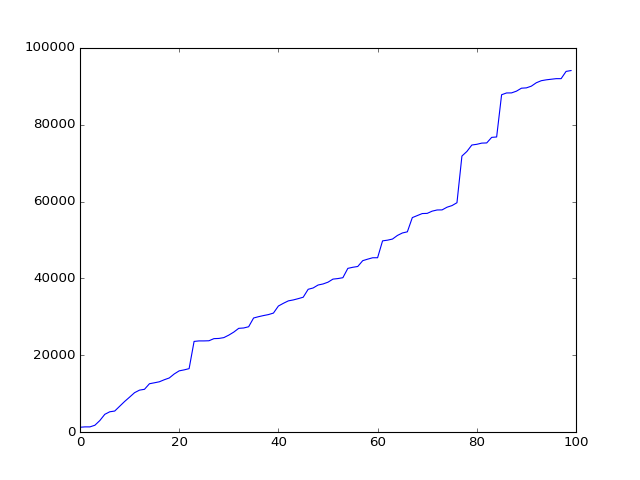

In [6]:
plt.plot(df.num_uniqe_frags.tolist())

In [ ]:
# trees = pd.read_pickle('/project/projectdirs/openmsi/projects/ben_run_pactolus/trees_with_inchi.pkl')

In [ ]:
no_attrs= []
for i,row in trees.iterrows():
    with h5py.File(row.filename) as f:
        if not 'inchi' in f[i].attrs.keys():
            print no_attrs.append(row.filename)
            


In [ ]:
len(no_attrs)

In [ ]:
trees.shape

In [ ]:
with h5py.File('/project/projectdirs/openmsi/projects/ben_trees/FragTreeLibrary_test_hdf5_5_JAABVEXCGCXWRR-UHFFFAOYSA-N.h5') as f:
    print f.items()
    for k in f['JAABVEXCGCXWRR-UHFFFAOYSA-N'].attrs.keys():
        print k,f['JAABVEXCGCXWRR-UHFFFAOYSA-N'].attrs[k]
    print f['JAABVEXCGCXWRR-UHFFFAOYSA-N'][u'FragTree_at_max_depth=5'].dtype

In [ ]:
tree.shape

In [ ]:
tree_df[pd.isnull(tree_df.formula)].shape

In [ ]:
def get_frag_tree(filename):
    with h5py.File(filename,'r') as tree:
        k1 = tree.keys()
        k2 = tree[k1[-1]].keys()
        the_tree = tree[k1[-1]][k2[-1]][:]
    return the_tree
tree_df['tree'] = tree_df.filename.apply(get_frag_tree)

In [ ]:
all_trees[999]

In [ ]:
# isotope_file = '/global/homes/b/bpb/metaiq/pactolus/max_abundance_isotopes.csv'
# isotope_dict = frag.get_isotope_dict(isotope_file)


In [ ]:
# #inchi = 'InChI=1S/C2H7NO/c3-1-2-4/h4H,1-3H2' #ethanolamine
# inchi = 'InChI=1S/C3H9N/c1-2-3-4/h2-4H2,1H3' #propylamine
# # inchi = 'InChI=1S/C12H27N/c1-2-3-4-5-6-7-8-9-10-11-12-13/h2-13H2,1H3' #dodecylamine
# # inchi = 'InChI=1S/C5H14NO/c1-6(2,3)4-5-7/h7H,4-5H2,1-3H3/q+1' #choline
# # inchi = 'InChI=1S/C4H12N/c1-5(2,3)4/h1-4H3/q+1' #tetramethylammonium
# #inchi = 'InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1' #glucose
# #baumin
# # inchi = 'InChI=1S/C27H22O11/c1-36-23(34)12-16-11-21(32)24(26(37-16)14-4-7-18(29)20(31)9-14)25-22(33)10-15(38-27(25)35)5-2-13-3-6-17(28)19(30)8-13/h2-11,24,26,28-31,33H,12H2,1H3/b5-2+/t24-,26-/m1/s1'
# mol = Chem.MolFromInchi(inchi)

# frag = reload(frag)
# f_tree = frag.FragTree(mol,isotope_dict,50)
# print len(f_tree.fragment_dict.items())
# for k,v in f_tree.fragment_dict.items():
#     print k,v

In [ ]:
# wm = Chem.RWMol(Chem.AddHs(mol))
# num_atoms = wm.GetNumAtoms()
# print num_atoms
# wm


In [ ]:
# frags = []
# # for k,v in f_tree.fragment_dict.items():
# k,v = f_tree.fragment_dict.items()[0]
# print k
# mol_hs = Chem.AddHs(mol)
# atoms_to_remove = list(set(range(num_atoms)) - set(k))
# print atoms_to_remove
# heavy_atoms_to_remove = [idx for idx in atoms_to_remove if mol_hs.GetAtomWithIdx(idx).GetAtomicNum() > 1]
# wm = Chem.RWMol(mol)
# print heavy_atoms_to_remove
# for atom_idx in heavy_atoms_to_remove:
#     wm.RemoveAtom(atom_idx)
# #     frags.append(wm)
# #     print atom_idx
# wm
# # Draw.MolsToGridImage(frags,molsPerRow=7,useSVG=True)

In [ ]:

# ethanolamine_file = [f for f in tree_files if 'HZAXFHJVJLSVMW-UHFFFAOYSA-N' in f][-1]
# ethanolamine_file

In [ ]:
# tree_file = h5py.File(ethanolamine_file,'r')
# tree_list = tree_file[tree_file.keys()[0]]
# tree = tree_list[tree_list.keys()[0]]
# print tree.dtype
# print 
# for i,t in enumerate(tree):
#     for s in t:
#         print i,s
#     print

### each row is a compound structure
* inchi_key
* is it in metatlas
* is a tree made to a depth of 5
* inchi_key has exact chembl preferred name & synonyms
* inchi_key has exact pubchem synonyms
* partial inchi_key has pubchem synonyms
* is a job submitted to build the tree


## fields to add to metatlas db
* path to tree file
* prefered name from chembl
* full inchikey synonyms from chembl
* full inchikey synonyms from pubchem
* partial inchikey synonyms from pubchem
* partial inchikey pubchem cid
* inchikey pubchem cid

## submit inchi list to nersc
* trees that are not built need to be built
* small trees are fast
* large trees take 10 minutes to days
* once they are built register their location in the database
* some structures can't be built for various reasons

## stop-gap plan
* add location of tree to database
* all trees must be in database
* not all database compound have trees

## store complete fragmentation of trees
* store all unique fragments
* store parent child relationship for each fragment
* at some point generating fragment is faster than storing
* only store immediate relationship between fragment
* each fragment has an id
* store a table linking parent and child